# Let's create a random data set with two features and three clusters

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Creating a sample dataset with 4 clusters
x, y = make_blobs(n_samples=400, n_features=2, centers=3)
print (x[:5]) # shape location
print (y[:5]) # cluster member

display(x)

[[-4.73263333 -1.29159714]
 [ 5.79703953 -4.87718864]
 [-3.17283028 -1.94175315]
 [-6.42894897  7.28317626]
 [-3.71651327 -3.66964685]]
[1 2 1 0 1]


array([[-4.73263333, -1.29159714],
       [ 5.79703953, -4.87718864],
       [-3.17283028, -1.94175315],
       [-6.42894897,  7.28317626],
       [-3.71651327, -3.66964685],
       [-7.47707628,  8.52664324],
       [-6.32389645,  8.71852559],
       [-2.44146644, -2.20320743],
       [-3.60519492, -2.28345904],
       [ 5.34633732, -4.66240636],
       [-7.47471785,  9.16277999],
       [-2.7948166 , -2.04185112],
       [-1.92504433,  0.99309689],
       [ 5.85861229, -6.19393977],
       [-8.08150669,  7.96795231],
       [-8.04774138,  9.11654228],
       [ 5.82156631, -5.93239608],
       [ 6.55693645, -4.9868622 ],
       [-4.11328415, -0.62646789],
       [-7.52409084,  8.2095062 ],
       [-6.96679732,  8.89458974],
       [-2.83398802, -2.0652129 ],
       [-6.30881725,  9.25864314],
       [ 4.38940043, -5.82481491],
       [-8.62731958,  9.2016602 ],
       [-2.63639453, -3.5234443 ],
       [-4.58800889, -2.2652253 ],
       [-3.53140146, -1.96729884],
       [ 5.62696621,

## Plot it just to visualize it first

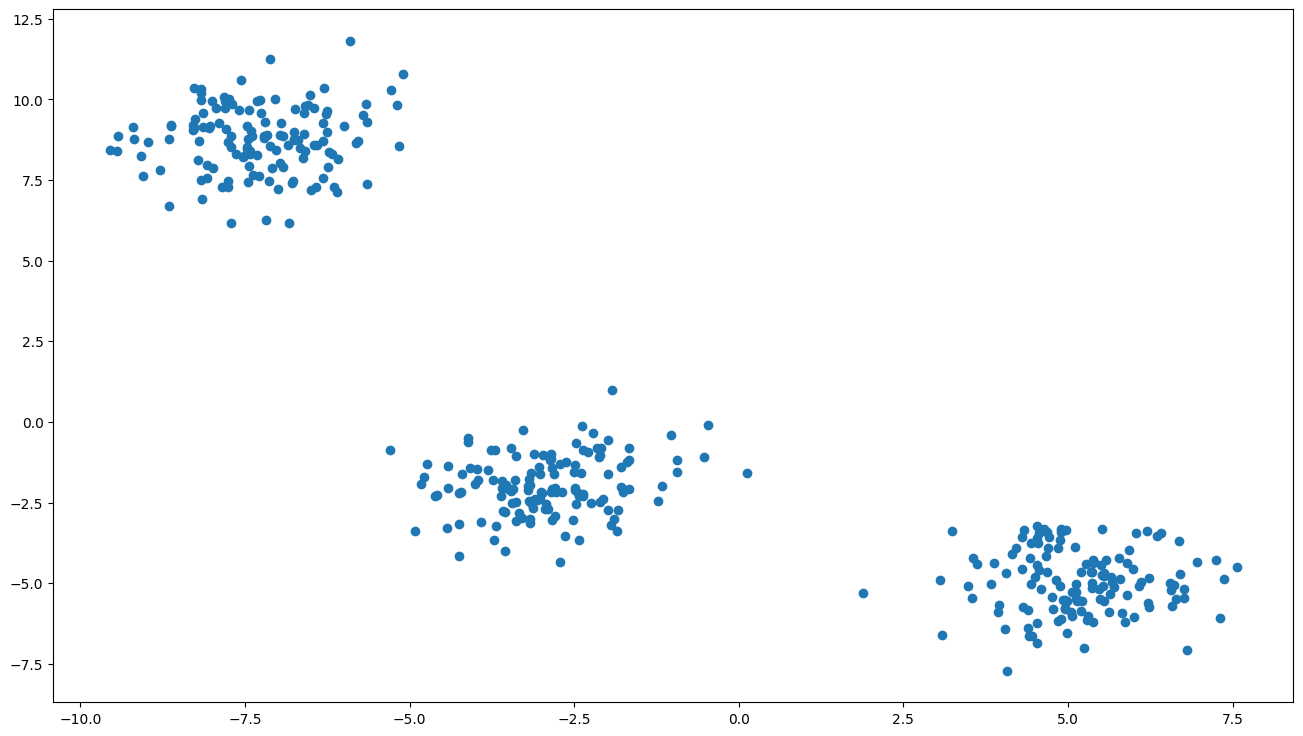

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(x[:,0],x[:,1],'o')
plt.show()


## Run a cluster model

In [15]:
from sklearn import cluster
CLUSTERS = 3
k_means = cluster.KMeans(n_clusters=CLUSTERS, random_state = 12)
print('labels_' in dir(k_means))
k_means.fit(x)
print('labels_' in dir(k_means))
print(k_means.labels_)
print(k_means.cluster_centers_)

False
True
[0 2 0 1 0 1 1 0 0 2 1 0 0 2 1 1 2 2 0 1 1 0 1 2 1 0 0 0 2 0 2 2 1 2 2 2 1
 0 2 0 2 0 1 2 0 2 2 2 1 2 0 1 0 1 2 1 0 1 2 2 0 0 2 2 2 2 0 1 0 1 2 1 1 1
 0 2 2 0 1 0 2 0 1 0 2 0 2 2 0 1 2 1 2 2 1 1 2 0 2 2 1 1 1 1 0 1 2 1 0 2 0
 1 0 2 0 2 2 1 1 2 0 2 0 2 1 2 1 0 0 2 2 1 0 1 1 1 2 1 0 2 0 0 1 1 0 0 1 0
 0 2 1 2 0 1 1 1 2 2 0 2 0 1 1 2 2 1 1 0 2 2 0 0 1 2 2 0 0 1 1 1 0 0 0 1 1
 2 1 1 1 1 0 2 2 2 0 2 1 0 1 1 0 2 2 0 1 1 0 0 2 2 2 1 2 0 0 2 0 0 1 0 1 0
 0 0 0 2 2 2 2 1 0 1 2 1 0 0 0 1 2 0 0 0 0 1 2 0 0 2 2 0 0 2 2 1 0 2 1 0 1
 0 0 1 2 1 0 1 2 2 2 2 1 1 0 1 1 0 2 1 1 1 0 2 1 0 2 0 0 0 0 1 2 0 2 0 2 1
 1 0 1 1 1 1 0 0 0 0 1 0 1 2 0 1 0 2 2 1 2 2 1 0 2 2 1 2 1 2 1 2 0 1 2 2 2
 0 0 0 2 2 2 0 0 2 2 2 0 2 2 1 1 1 0 2 1 2 1 1 0 0 2 1 1 0 1 2 2 1 2 2 2 0
 1 1 0 1 2 2 1 0 1 0 1 0 0 0 1 0 1 1 0 2 1 0 2 1 2 1 1 2 1 1]
[[-2.93042528 -1.95667857]
 [-7.27486206  8.75880599]
 [ 5.16983076 -4.96314704]]


## Plot using the cluster analysis results

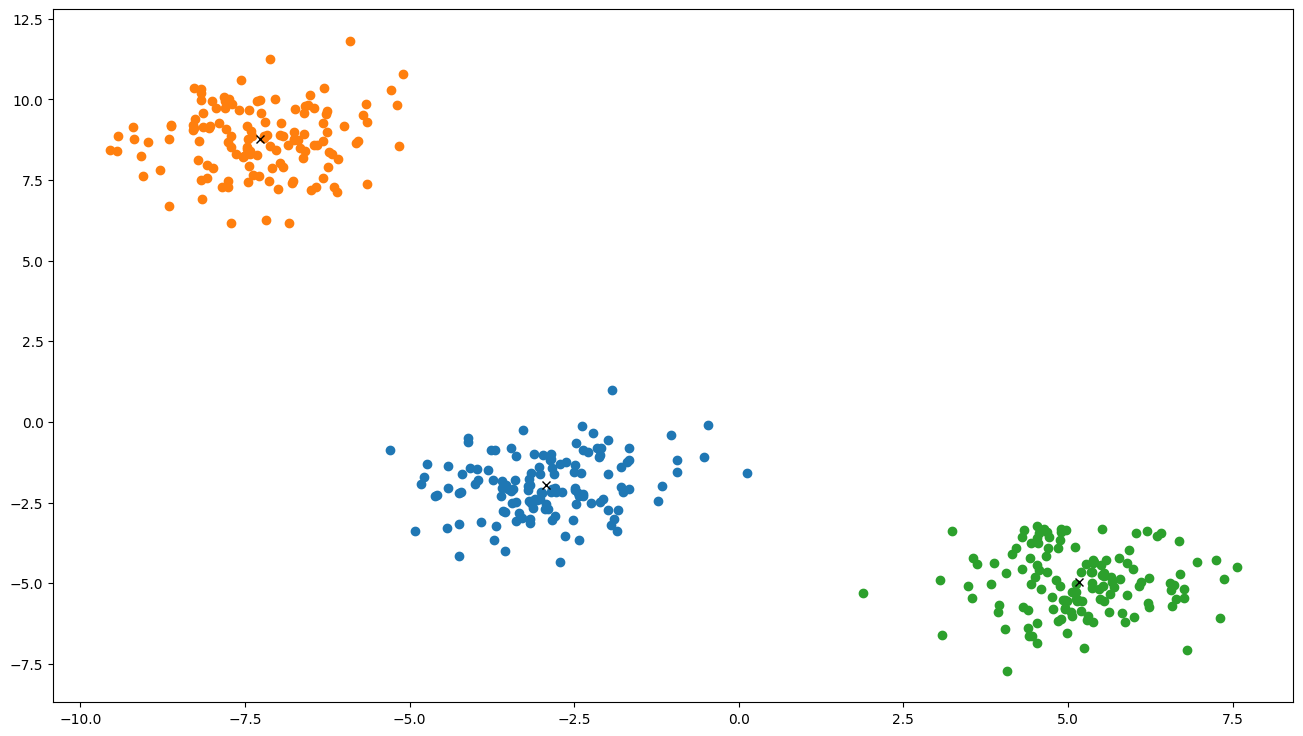

In [16]:
%matplotlib inline
def plot_cluster(model, data, clusters):
    labels = model.labels_
    centroids = model.cluster_centers_
    
    for i in range(clusters):
        ds = data[np.where(labels==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.show()

plot_cluster(k_means, x, CLUSTERS)


## Use the elbow chart to help figure out how many clusters you should use

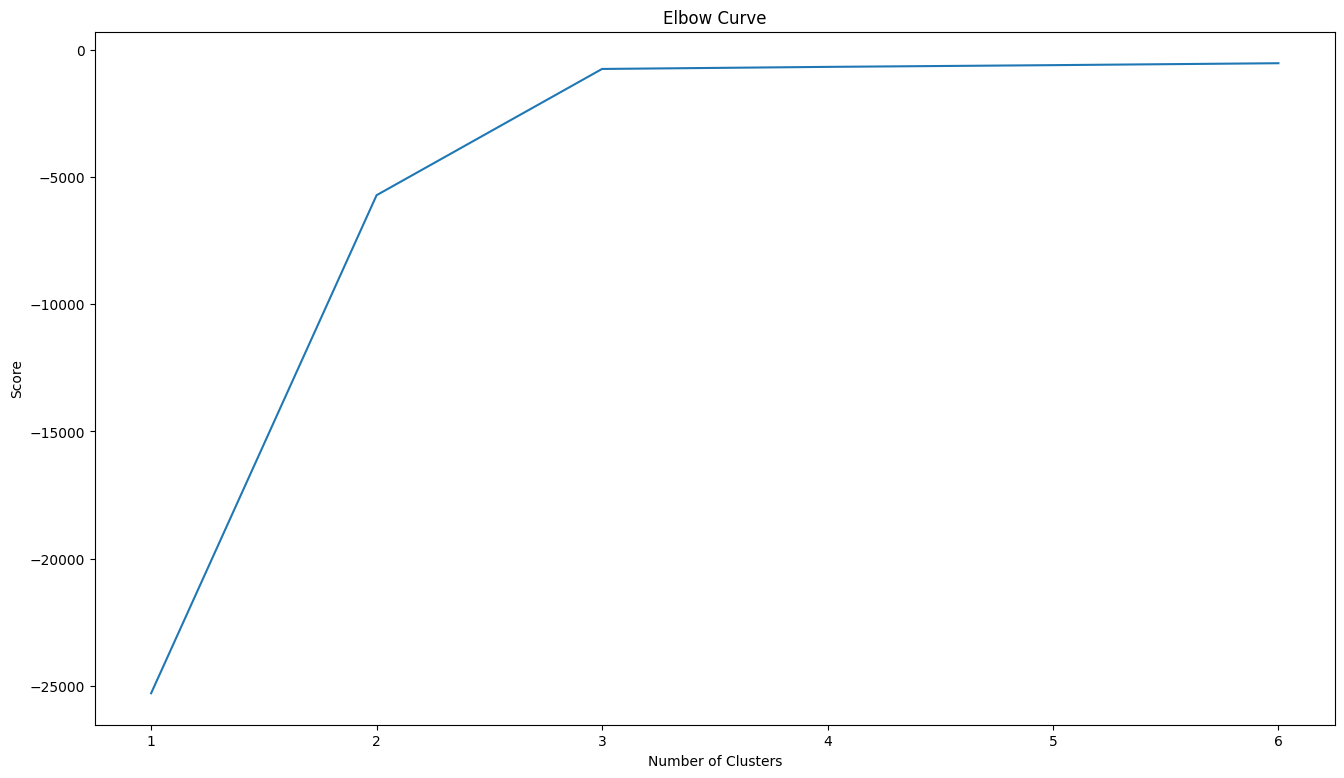

In [17]:
def plot_elbow(data, cluster_cnt = 6):
   CLUSTERS = range(1, cluster_cnt + 1)
   kmeans = [cluster.KMeans(n_clusters=i) for i in CLUSTERS]

   score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
   #print(score)
   plt.plot(CLUSTERS ,score)
   plt.xlabel('Number of Clusters')
   plt.ylabel('Score')
   plt.title('Elbow Curve')
   plt.xticks(np.arange(1, cluster_cnt + 1, 1))
   plt.show()

plot_elbow(x)

For n_clusters = 2 The average silhouette_score is : 0.7166100091922318
For n_clusters = 3 The average silhouette_score is : 0.8185243515047727
For n_clusters = 4 The average silhouette_score is : 0.6331375073912784
For n_clusters = 5 The average silhouette_score is : 0.48130039617552584
For n_clusters = 6 The average silhouette_score is : 0.4740252225725284


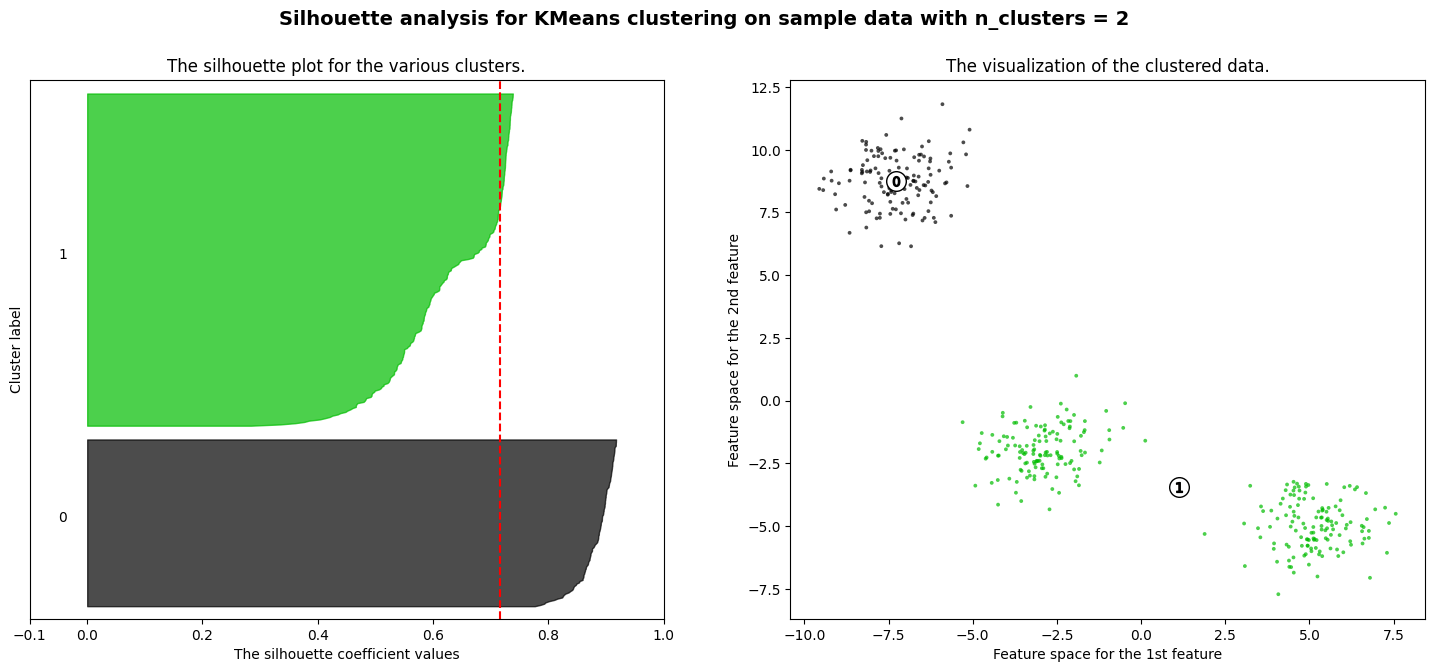

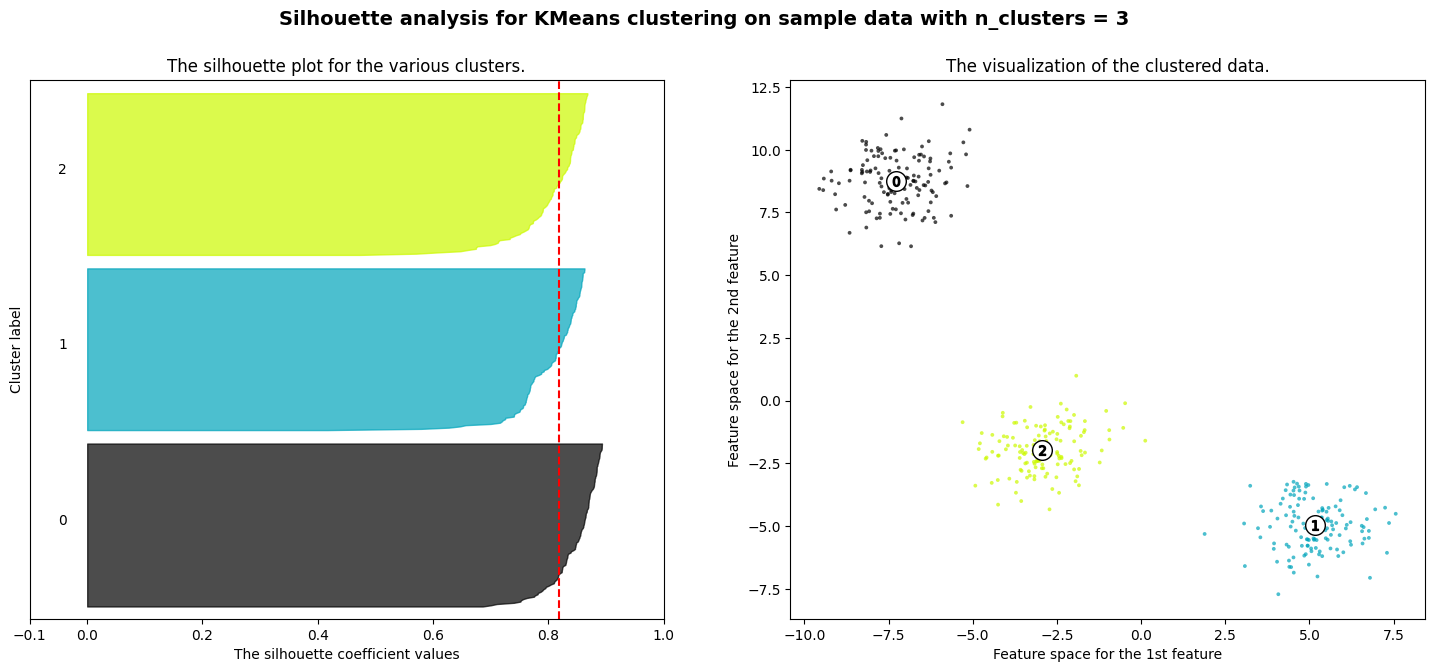

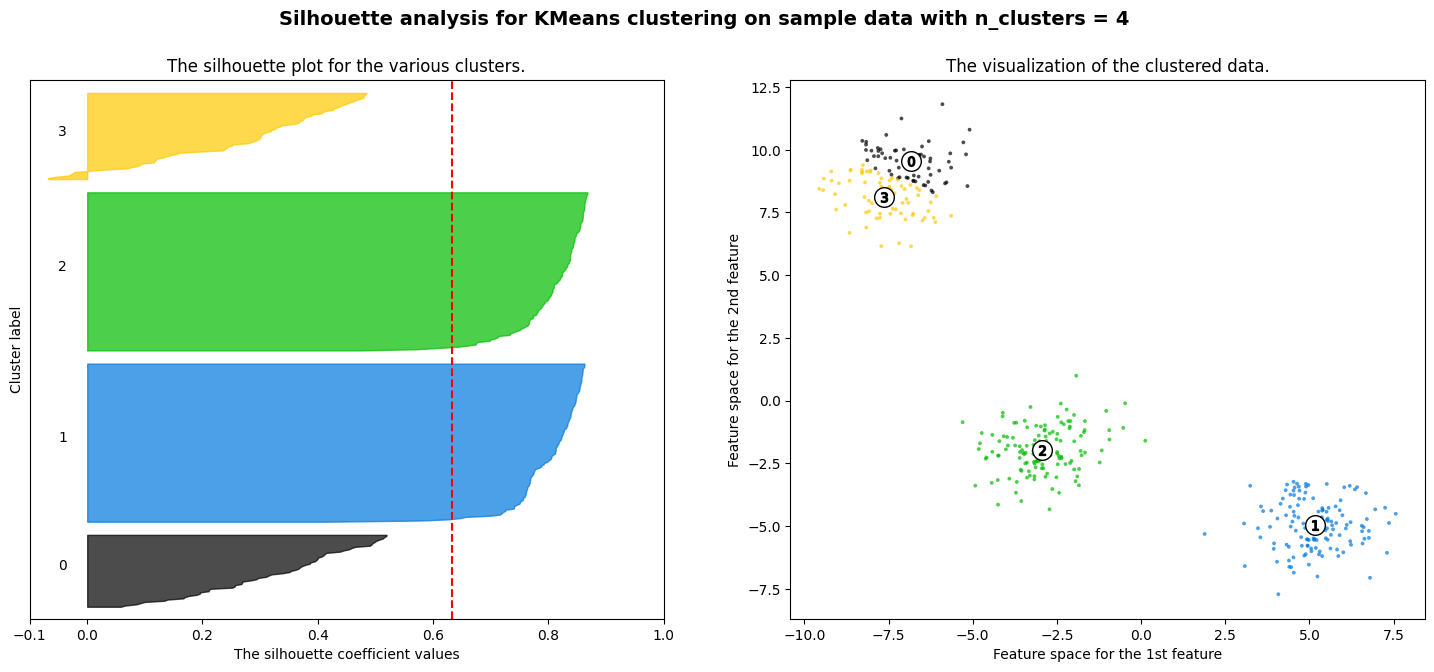

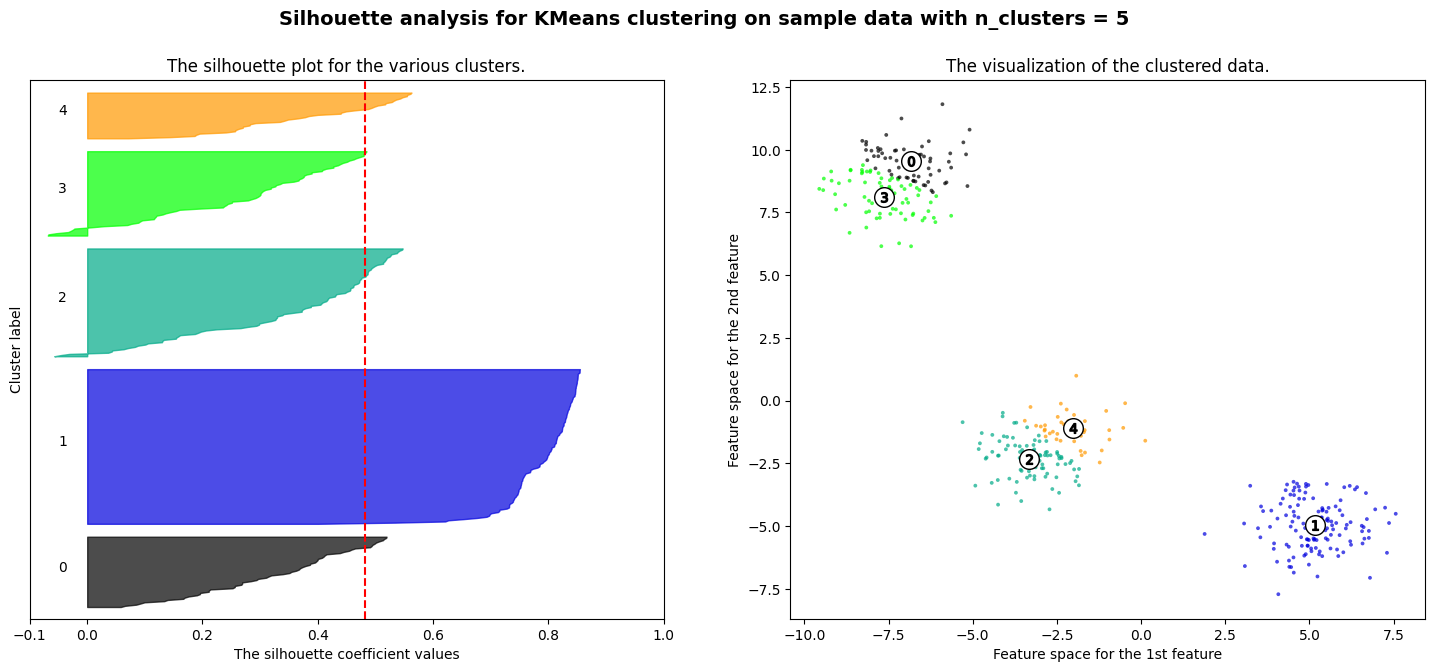

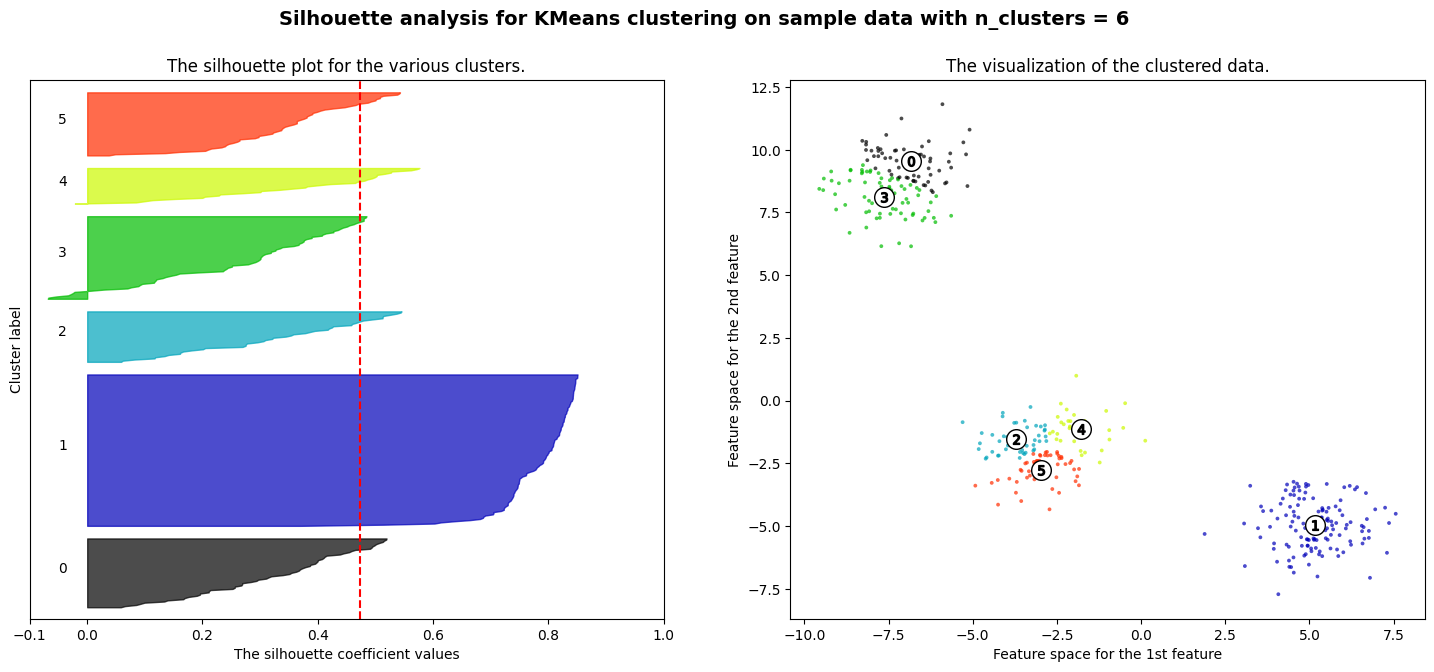

In [18]:
%matplotlib inline

def silhouette_plot(data, count = 6):
   from sklearn.datasets import make_blobs
   from sklearn.cluster import KMeans
   from sklearn.metrics import silhouette_samples, silhouette_score

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)  # For reproducibility

   range_n_clusters = range(2, count + 1)

   for n_clusters in range_n_clusters:
       # Create a subplot with 1 row and 2 columns
       fig, (ax1, ax2) = plt.subplots(1, 2)
       fig.set_size_inches(18, 7)

       # The 1st subplot is the silhouette plot
       # The silhouette coefficient can range from -1, 1 but in this example all
       # lie within [-0.1, 1]
       ax1.set_xlim([-0.1, 1])
       # The (n_clusters+1)*10 is for inserting blank space between silhouette
       # plots of individual clusters, to demarcate them clearly.
       ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

       # Initialize the clusterer with n_clusters value and a random generator
       # seed of 10 for reproducibility.
       clusterer = KMeans(n_clusters=n_clusters, random_state=10)
       cluster_labels = clusterer.fit_predict(data)

       # The silhouette_score gives the average value for all the samples.
       # This gives a perspective into the density and separation of the formed
       # clusters
       silhouette_avg = silhouette_score(data, cluster_labels)
       print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

       # Compute the silhouette scores for each sample
       sample_silhouette_values = silhouette_samples(data, cluster_labels)

       y_lower = 10
       for i in range(n_clusters):
           # Aggregate the silhouette scores for samples belonging to
           # cluster i, and sort them
           ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

           ith_cluster_silhouette_values.sort()

           size_cluster_i = ith_cluster_silhouette_values.shape[0]
           y_upper = y_lower + size_cluster_i

           color = cm.nipy_spectral(float(i) / n_clusters)
           ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

           # Label the silhouette plots with their cluster numbers at the middle
           ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

           # Compute the new y_lower for next plot
           y_lower = y_upper + 10  # 10 for the 0 samples

       ax1.set_title("The silhouette plot for the various clusters.")
       ax1.set_xlabel("The silhouette coefficient values")
       ax1.set_ylabel("Cluster label")

       # The vertical line for average silhouette score of all the values
       ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

       ax1.set_yticks([])  # Clear the yaxis labels / ticks
       ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

       # 2nd Plot showing the actual clusters formed
       colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
       ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

       # Labeling the clusters
       centers = clusterer.cluster_centers_
       # Draw white circles at cluster centers
       ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

       for i, c in enumerate(centers):
           ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

       ax2.set_title("The visualization of the clustered data.")
       ax2.set_xlabel("Feature space for the 1st feature")
       ax2.set_ylabel("Feature space for the 2nd feature")

       plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

   plt.show()

silhouette_plot(x, 6)


In [3]:
import pandas as pd
df = pd.read_csv('CreditCardFraud.csv')
display(df)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
df = df[columns]
df.type = pd.Categorical(df.type).codes
print(df.shape, df.columns)
display(df.head())


(6362620, 7) Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [9]:
train_size = .3
test_size = .1
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
dfNB = df
trainNB_X, testNB_X, trainNB_Y, testNB_Y = train_test_split(dfNB[dfNB.columns[:-1]], dfNB.isFraud, \
                                        train_size = train_size, test_size = test_size, random_state = 1)

print('Train Set Percentages', trainNB_Y.value_counts()/trainNB_Y.count())
print('Test Set Percentages', testNB_Y.value_counts()/testNB_Y.count())
display(trainNB_X.head(10))

Train Set Percentages isFraud
0    0.998711
1    0.001289
Name: count, dtype: float64
Test Set Percentages isFraud
0    0.998713
1    0.001287
Name: count, dtype: float64


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2905745,3,37893.89,459458.00,421564.11,0.00,0.00
1736803,3,6845.16,21681.00,14835.84,0.00,0.00
5280454,1,228634.04,11468.00,0.00,16189748.80,16418382.84
2661986,1,119743.66,0.00,0.00,167874.79,287618.45
5558756,0,247921.74,8331614.08,8579535.82,306347.82,58426.08
395499,0,34281.10,8133480.89,8167761.99,1515351.48,1481070.38
4164423,1,49158.31,0.00,0.00,97500.27,146658.58
2956930,3,7481.25,634.00,0.00,0.00,0.00
5837600,3,9018.38,283780.19,274761.81,0.00,0.00
1402926,1,73857.88,0.00,0.00,169013.85,253218.35


In [10]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(trainNB_X, trainNB_Y)

GaussianNB()

In [21]:
def evaluate_predictions(test, pred, show_percent = True, show_details = False):
    from sklearn.metrics import confusion_matrix
    length = len(test)
    cm = confusion_matrix(test, pred)
    if show_details:
        print(f'Test length = {length}')
        print('\nTest Values')
        print(test.value_counts())
        print('\nPredicted Values')
        print(pd.value_counts(pred))
        print('\n TP FN\n FP TN')
        print(cm)

    
    print(f'''
A |\t\tPredicted
c |\tTP/FP\t|\tFN/TN\t|\tAP/AN
t +---------------------------------------------
u |\t{cm[0,0]:>7}\t|\t{cm[0, 1]:>7}\t|\t{test.value_counts()[0]:>7}
a |\t{cm[1,0]:>7}\t|\t{cm[1, 1]:>7}\t|\t{test.value_counts()[1]:>7}
l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}
''')
    
    if show_percent:
        import numpy as np
        print('\n PC FP\n FN PW')
        print(np.ndarray(shape = (2,2), buffer = np.array([round(100 *(cm[0][0] + cm[1][1])/length, 1), \
           round(100 * cm[0][1]/length, 1), round(100 * cm[1][0]/length, 1), round(100 * (cm[1][0] + cm[0][1])/length, 1)])))

          

predNB_Y = modelNB.predict(testNB_X)
evaluate_predictions(testNB_Y, predNB_Y, show_details = False)



A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 629249	|	   6194	|	 635443
a |	    701	|	    118	|	    819
l |	 629950	|	   6312	|	 636262


 PC FP
 FN PW
[[98.9  1. ]
 [ 0.1  1.1]]


/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}


In [12]:
from joblib import dump, load
dump(modelNB, 'modelNB.joblib') 


['modelNB.joblib']

In [22]:
modelNB2 = load('modelNB.joblib')
predNB_Y = modelNB2.predict(testNB_X)

evaluate_predictions(testNB_Y, predNB_Y)



A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 629249	|	   6194	|	 635443
a |	    701	|	    118	|	    819
l |	 629950	|	   6312	|	 636262


 PC FP
 FN PW
[[98.9  1. ]
 [ 0.1  1.1]]


/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp

def dummy_code(data, columns, drop_first = True):
    for c in columns:
        dummies = pd.get_dummies(data[c], prefix = c, drop_first = drop_first)
        i = list(data.columns).index(c)
        data = pd.concat([data.iloc[:,:i], dummies, data.iloc[:,i+1:]], axis = 1)
    return data

dfLR = dummy_code(df, ['type'], drop_first = False)
trainLR_X, testLR_X, trainLR_Y, testLR_Y = train_test_split(dfLR.iloc[:,dfLR.columns != 'isFraud'], dfLR.isFraud, train_size = train_size, test_size = test_size, random_state = 1)

print(testLR_X.columns)
display(testLR_X.head())

Index(['type_0', 'type_1', 'type_2', 'type_3', 'type_4', 'amount',
       'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


,type_0,type_1,type_2,type_3,type_4,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6322570,True,False,False,False,False,23557.12,8059.00,31616.12,169508.66,145951.53
3621196,False,False,False,True,False,6236.13,0.00,0.00,0.00,0.00
1226256,False,False,False,True,False,33981.87,18745.72,0.00,0.00,0.00
2803274,False,True,False,False,False,263006.42,20072.00,0.00,390253.56,653259.98
3201247,False,True,False,False,False,152013.74,20765.00,0.00,252719.19,404732.93


In [23]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class='auto', solver='lbfgs')
modelLR.fit(trainLR_X, trainLR_Y)
print(modelLR.coef_)

[[-3.95105364e-03 -4.22634186e-01 -7.50314754e-02 -4.66392956e+00
  -1.12236388e-02 -1.66770581e-05  2.97950590e-05 -3.29627900e-05
   4.78291530e-06 -5.09636892e-06]]


/Users/joey/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
%matplotlib inline
import numpy as np
predLR_Y = modelLR.predict(testLR_X)

score = modelLR.score(testLR_X, testLR_Y)
mse = np.mean((predLR_Y - testLR_Y)**2)
print(score, mse, '\n')

evaluate_predictions(testLR_Y, predLR_Y)


0.9992283053207641 0.0007716946792359123 


A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635408	|	     35	|	 635443
a |	    456	|	    363	|	    819
l |	 635864	|	    398	|	 636262


 PC FP
 FN PW
[[99.9  0. ]
 [ 0.1  0.1]]


/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}


In [25]:
predLR_Y = modelLR.predict_proba(testLR_X)
print(predLR_Y[:10])
print('Score', modelLR.score(testLR_X, testLR_Y))

for threshold in range(10, 91, 10):
    predLR_Y1 = np.where(predLR_Y[:,0] >= threshold/100, 0, 1)
    mse = np.mean((predLR_Y1 - testLR_Y)**2)
    print ('\nTHRESHOLD', threshold, 'MSE', mse)

    evaluate_predictions(testLR_Y, predLR_Y1, show_percent = False)



[[9.98182908e-01 1.81709249e-03]
 [9.99952021e-01 4.79789710e-05]
 [9.99947197e-01 5.28031317e-05]
 [9.99980600e-01 1.93996692e-05]
 [9.99768288e-01 2.31711557e-04]
 [9.99949238e-01 5.07622854e-05]
 [9.99035190e-01 9.64810112e-04]
 [9.99999962e-01 3.76138365e-08]
 [1.00000000e+00 1.94396556e-15]
 [9.99999999e-01 7.99071277e-10]]
Score 0.9992283053207641

THRESHOLD 10 MSE 0.0008329901832892739

A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635428	|	     15	|	 635443
a |	    515	|	    304	|	    819
l |	 635943	|	    319	|	 636262


THRESHOLD 20 MSE 0.000803128271058149

A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635423	|	     20	|	 635443
a |	    491	|	    328	|	    819
l |	 635914	|	    348	|	 636262


THRESHOLD 30 MSE 0.0007905548343292543


/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}
/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}
/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}



A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635420	|	     23	|	 635443
a |	    480	|	    339	|	    819
l |	 635900	|	    362	|	 636262


THRESHOLD 40 MSE 0.0007779813976003596

A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635416	|	     27	|	 635443
a |	    468	|	    351	|	    819
l |	 635884	|	    378	|	 636262


THRESHOLD 50 MSE 0.0007716946792359123

A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635408	|	     35	|	 635443
a |	    456	|	    363	|	    819
l |	 635864	|	    398	|	 636262


THRESHOLD 60 MSE 0.0007811247567825832

A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635397	|	     46	|	 635443
a |	    451	|	    368	|	    819
l |	 635848	|	    414	|	 636262


THRESHOLD 70 MSE 0.0007716946792359123

A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +-------------------------------------------

/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}
/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}
/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}
/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarnin


A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635337	|	    106	|	 635443
a |	    409	|	    410	|	    819
l |	 635746	|	    516	|	 636262


THRESHOLD 90 MSE 0.0009634395893515565

A |		Predicted
c |	TP/FP	|	FN/TN	|	AP/AN
t +---------------------------------------------
u |	 635205	|	    238	|	 635443
a |	    375	|	    444	|	    819
l |	 635580	|	    682	|	 636262



/var/folders/5b/49rmznmd3cj0z4jpln30npf40000gn/T/ipykernel_1756/1392034980.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l |\t{pd.value_counts(pred)[0]:>7}\t|\t{pd.value_counts(pred)[1]:>7}\t|\t{length:>7}


In [27]:
import pandas as pd

USAhousing = pd.read_csv('USA_Housing.csv')
print(USAhousing.columns)
display(USAhousing)


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [28]:
from sklearn.model_selection import train_test_split

x = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.4, random_state = 101)


In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(trainX, trainY)
#dir(lm)
predictions = lm.predict(testX)
print(testY[:10])
print(predictions[:10])


1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
Name: Price, dtype: float64
[1260960.70567626  827588.75560352 1742421.24254328  974625.38739909
  998717.84202015  645754.08836701 1083215.90915516  855334.94872344
 1445671.40030584 1202846.01438938]


NameError: name 'plt' is not defined

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testY, predictions))
print('Variance score: %.2f' % r2_score(testY, predictions))
print(lm.coef_, lm.intercept_)

Mean squared error: 10460958907.21
Variance score: 0.92
[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01] -2640159.796851912
